<a href="https://colab.research.google.com/github/Calvin-Costa/cursopythonpanda/blob/main/Caderno2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segundo exemplo de manipulação de dados usando Python Pandas!!**
Veremos inserção de dados, remoção de colunas, merge e gráficos!

Aula do dia 09 e 10 de Fevereiro de 2023.
Aluno Calvin Silva Moreira da Costa

In [3]:
import pandas as pd



In [4]:
combustiveis_df = pd.read_excel("ca-2021-02.xlsx")

In [5]:
combustiveis_df['Ativo'] = True
display(combustiveis_df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA,2021-11-01,6.799,NaN,R$ / litro,VIBRA ENERGIA,True
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,ETANOL,2021-11-01,5.299,NaN,R$ / litro,VIBRA ENERGIA,True
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL,2021-11-01,5.549,NaN,R$ / litro,VIBRA ENERGIA,True
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,2021-11-01,6.899,NaN,R$ / litro,VIBRA ENERGIA,True
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL S10,2021-11-01,5.649,NaN,R$ / litro,VIBRA ENERGIA,True


In [6]:
# Criar uma coluna "Obs" que tenha nela escrito "MELHOR CIDADE" quando a coluna Municipio for igual a RIO DE JANEIRO
combustiveis_df['Obs'] = ['MELHOR CIDADE' if municipio == 'RIO DE JANEIRO' else '' for municipio in combustiveis_df['Municipio']]

In [7]:
#pip install numpy
# Obs.: quando instala o pandas, o numpy já vem instalado!
import numpy as np
combustiveis_df['Valor de Venda - Status'] = np.where(combustiveis_df['Valor de Venda'] > 6.5, 'Caro','Barato')
display(combustiveis_df[['Revenda', 'Valor de Venda', 'Valor de Venda - Status']])

,Revenda,Valor de Venda,Valor de Venda - Status
0,POSTO ARAPIRACA LTDA,6.799,Caro
1,POSTO ARAPIRACA LTDA,5.299,Barato
2,POSTO ARAPIRACA LTDA,5.549,Barato
3,POSTO ARAPIRACA LTDA,6.899,Caro
4,POSTO ARAPIRACA LTDA,5.649,Barato
...,...,...,...
168404,COMERCIAL DE COMBUSTIVEL CACHOEIRINHA LTDA,5.859,Barato
168405,ABC DISTRIBUICAO DE PETROLEO LTDA,6.580,Caro
168406,ABC DISTRIBUICAO DE PETROLEO LTDA,4.740,Barato
168407,ABC DISTRIBUICAO DE PETROLEO LTDA,5.448,Barato


In [8]:
num_habitantes_df = pd.read_csv("ibge_num_habitantes.csv", sep=";")

In [9]:
#Calcular postos de gasolina por habitante na amostragem de combustiveis nov/2021

num_habitantes_df.rename(columns={"Estado":"Estado - Sigla"}, inplace=True)
display(num_habitantes_df)



,Municipio,Estado - Sigla,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


In [10]:
#Faz um MERGE dos dois dataframes

colunas = ['Municipio', 'Estado - Sigla']
merge_df = combustiveis_df.merge(num_habitantes_df, how="inner", on=colunas)
# o inner retorna apenas casos que correlacionam as 2 tabelas. como nem todos os municipios
# de combustiveis_df estão contemplados em num_habitantes_df, o "inner" descartou todos
# os resultados que não se correlacionaram.
#merge_df = combustiveis_df.merge(num_habitantes_df, how="left", on=colunas)
# o "left" considera que o combustiveis_df é a coluna "master" e não apaga as linhas que não se correlacionam
#merge_df = combustiveis_df.merge(num_habitantes_df, how="right", on=colunas)
# o right é o oposto do left
#merge_df = combustiveis_df.merge(num_habitantes_df, how="outer", on=colunas)
# o outer faz tudo junto. Tem tbm o cross que faz um produto cartesiano
display(merge_df)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,Valor de Venda - Status,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,,Caro,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,,Barato,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,,Caro,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,,Caro,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,,Barato,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160,NaN,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,NaN,R$ / litro,IPIRANGA,True,,Barato,260690
20630,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,NaN,R$ / litro,RAIZEN,True,,Barato,260690
20631,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,NaN,R$ / litro,RAIZEN,True,,Caro,260690
20632,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,NaN,R$ / litro,RAIZEN,True,,Barato,260690


In [11]:
# destruir coluna completamente vazia (todas as linhas são nulas)
merge_df.dropna(axis='columns', inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Regiao - Sigla           20634 non-null  object        
 1   Estado - Sigla           20634 non-null  object        
 2   Municipio                20634 non-null  object        
 3   Revenda                  20634 non-null  object        
 4   CNPJ da Revenda          20634 non-null  object        
 5   Nome da Rua              20634 non-null  object        
 6   Numero Rua               20634 non-null  object        
 7   Bairro                   20634 non-null  object        
 8   Cep                      20634 non-null  object        
 9   Produto                  20634 non-null  object        
 10  Data da Coleta           20634 non-null  datetime64[ns]
 11  Valor de Venda           20634 non-null  float64       
 12  Unidade de Medida        20634 n

In [12]:
colunas=['Regiao - Sigla', 'Nome da Rua', 'Numero Rua', 
         'Bairro', 'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda',
         'Unidade de Medida', 'Bandeira', 'Ativo']
merge_df.drop(labels=colunas, axis=1, inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Estado - Sigla           20634 non-null  object
 1   Municipio                20634 non-null  object
 2   Revenda                  20634 non-null  object
 3   CNPJ da Revenda          20634 non-null  object
 4   Obs                      20634 non-null  object
 5   Valor de Venda - Status  20634 non-null  object
 6   NumHabitantes2021        20634 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None


In [13]:
display(merge_df.head(100))

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Obs,Valor de Venda - Status,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,,Caro,1555626
1,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,,Barato,1555626
2,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,,Caro,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,,Caro,1555626
4,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,,Barato,1555626
...,...,...,...,...,...,...,...
95,GO,GOIANIA,AUTO POSTO DONA SANTA LTDA.,08.232.672/0001-34,,Caro,1555626
96,GO,GOIANIA,AUTO POSTO DONA SANTA LTDA.,08.232.672/0001-34,,Barato,1555626
97,GO,GOIANIA,AUTO POSTO ANTENA 104 EIRELI,05.634.368/0001-25,,Barato,1555626
98,GO,GOIANIA,AUTO POSTO ANTENA 104 EIRELI,05.634.368/0001-25,,Caro,1555626


In [14]:
#removendo linhas repetidas:
merge_df.drop_duplicates(inplace=True)
display(merge_df.head(100))

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Obs,Valor de Venda - Status,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,,Caro,1555626
1,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,,Barato,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,,Caro,1555626
4,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,,Barato,1555626
7,GO,GOIANIA,POSTO DN LTDA,05.413.136/0001-47,,Caro,1555626
...,...,...,...,...,...,...,...
182,GO,GOIANIA,AUTO POSTO LIDER LTDA,15.225.748/0001-60,,Caro,1555626
185,GO,GOIANIA,ALL ' FORTE AUTO POSTO LTDA,20.173.970/0001-04,,Barato,1555626
186,GO,GOIANIA,ALL ' FORTE AUTO POSTO LTDA,20.173.970/0001-04,,Caro,1555626
188,GO,GOIANIA,MARQUES DE CASTRO & GABRIEL LTDA,04.397.008/0002-75,,Caro,1555626


In [39]:
#Agrupar e contar quantos postos tem na cidade
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio','NumHabitantes2021']).count()
postos_por_municipio_df.drop(['CNPJ da Revenda','Obs'], axis=1, inplace=True)
postos_por_municipio_df.reset_index(inplace=True)
display(postos_por_municipio_df.info())
postos_por_municipio_df.rename(columns={"Revenda": "Numero de Postos"}, inplace=True)
display(postos_por_municipio_df)
#display(postos_por_municipio_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Estado - Sigla           15 non-null     object
 1   Municipio                15 non-null     object
 2   NumHabitantes2021        15 non-null     int64 
 3   Revenda                  15 non-null     int64 
 4   Valor de Venda - Status  15 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 728.0+ bytes


None

,Estado - Sigla,Municipio,NumHabitantes2021,Numero de Postos,Valor de Venda - Status
0,AC,RIO BRANCO,419452,88,88
1,GO,GOIANIA,1555626,186,186
2,MG,BELO HORIZONTE,2530701,108,108
3,MS,CAMPO GRANDE,916001,184,184
4,PR,CURITIBA,1963726,146,146
5,RJ,RIO DE JANEIRO,6775561,752,752
6,RN,NATAL,803739,74,74
7,RO,PORTO VELHO,548952,75,75
8,RS,PORTO ALEGRE,1492530,131,131
9,SP,CAMPINAS,1223237,74,74


In [40]:
postos_por_municipio_df['Postos Por Habitante'] = postos_por_municipio_df["NumHabitantes2021"]/postos_por_municipio_df["Numero de Postos"]
postos_por_municipio_df['Postos Por Habitante'] = postos_por_municipio_df['Postos Por Habitante'].round(2)
postos_por_municipio_df.rename(columns={'Postos Por Habitante': 'Num Habitantes Por Posto'}, inplace=True)
display(postos_por_municipio_df)

,Estado - Sigla,Municipio,NumHabitantes2021,Numero de Postos,Valor de Venda - Status,Num Habitantes Por Posto
0,AC,RIO BRANCO,419452,88,88,4766.50
1,GO,GOIANIA,1555626,186,186,8363.58
2,MG,BELO HORIZONTE,2530701,108,108,23432.42
3,MS,CAMPO GRANDE,916001,184,184,4978.27
4,PR,CURITIBA,1963726,146,146,13450.18
5,RJ,RIO DE JANEIRO,6775561,752,752,9010.05
6,RN,NATAL,803739,74,74,10861.34
7,RO,PORTO VELHO,548952,75,75,7319.36
8,RS,PORTO ALEGRE,1492530,131,131,11393.36
9,SP,CAMPINAS,1223237,74,74,16530.23


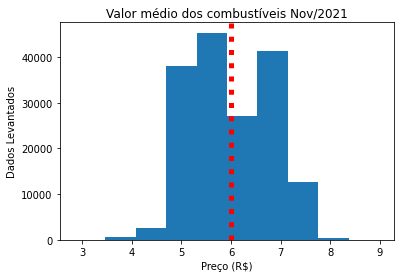

In [78]:
#brincando de gráficos

import matplotlib.pyplot as plt

plt.hist(combustiveis_df['Valor de Venda'])
plt.title("Valor médio dos combustíveis Nov/2021")
plt.xlabel("Preço (R$)")
plt.ylabel("Dados Levantados")
#Traça a linha vermelha tracejada com o preço médio
plt.axvline(combustiveis_df['Valor de Venda'].mean(), color='red', linestyle=':', linewidth=5)
plt.show()

In [80]:
# Segundo gráfico

c_mean = combustiveis_df['Valor de Venda'].groupby(by=combustiveis_df['Produto']).mean()
display(c_mean)


Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

<Figure size 720x360 with 0 Axes>

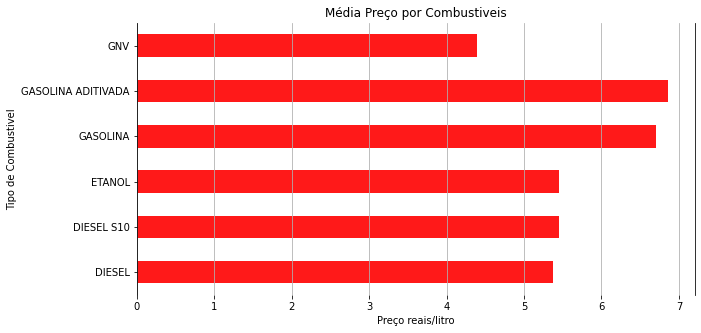

In [92]:
import seaborn as sns
#usando figure para definir a área do gráfico
plt.figure(figsize=(10,5))

#Plotando o gráfico parametrizado
plt.figure(figsize=(10, 5))

c_mean_grafico = c_mean.plot(
    kind="barh",
    title= "Média Preço por Combustiveis",
    xlabel="Tipo de Combustivel",
    ylabel="Preço reais/litro",
    color="red",
    alpha = 0.9,
)

c_mean_grafico.set_ylabel("Tipo de Combustivel")
c_mean_grafico.set_xlabel("Preço reais/litro")

plt.grid(axis="x")

sns.despine(right=False, bottom=True)

plt.show()


In [97]:
#c_mean.reset_index(inplace=True)
display(c_mean)
excel = "por_litro.xlsx"
c_mean.to_excel(excel,sheet_name="Sumário")

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

In [110]:
# Para personalizar a planilha EXCEL!!
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment
#wb = workbook
wb = load_workbook(excel) #vai abrir o excel no openpyxl

#Pegar a planilha certa usando o SHEET NAME (nome da planilha)
ws = wb['Sumário'] #work sheet > planilha ativa, que vai usar,etc

# Para pintar o cabeçalho da tabela de cinza
cor_cinza = PatternFill("solid",fgColor="808080")
coords = ['A1','B1']
for coord in coords:
  ws[coord].fill = cor_cinza

#onde o preço do combustível for maior ou igual a 6,5 reais, pinta-se de red
num_linha = 2
while(num_linha <= ws.max_row):
  coord = 'B'+str(num_linha)
  if ws[coord].value >= 6.5:
    ws[coord].font = Font(bold=True, color='FF0000')
  else:
    ws[coord].font = Font(color='00FF00')
  num_linha += 1
wb.save(excel)